In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#fs = pd.read_csv("H:/fish_assignment.csv")
seafood = pd.read_csv('C:/Users/djsch/OneDrive/Documents/Jobs/2019-10-19 Econ 30 at Agriculture/fish_assignment.csv')
seafood.index = seafood['Year']
seafood = seafood.drop(columns=['Year'])


In [39]:
print(seafood.head())
print(seafood.columns)
print(seafood.describe())

      Farmed Salmon  Farmed Shellfish  Groundfish  Herring  Other Farmed  \
Year                                                                       
1997          232.4              14.2       202.2    120.3           3.7   
1998          265.2              17.1       219.5    108.8           1.6   
1999          334.2              18.4       209.5    122.3           0.7   
2000          328.8              25.7       197.5    131.9           3.3   
2001          323.6              26.2       224.8    113.2           1.9   

      Other Wild  Wild Salmon  Wild Shellfish  Farmed Salmon.1  \
Year                                                             
1997        11.1        309.3           149.7            179.2   
1998         9.3        209.4           138.1            230.0   
1999        14.8        170.8           140.6            290.8   
2000        26.0        202.6           172.1            284.5   
2001        25.2        162.5           183.0            271.5   

    

In [3]:
# Make new datasets -- wv is wholesale value, lv is landing value, and lt is landings (tonnes)

wv = seafood.iloc[:, :8]
lv = seafood.iloc[:, 8:16]
lt = seafood.iloc[:, 16:]
lv.columns = wv.columns
lt.columns = wv.columns


      lv    lt    wv
lv  1.00  0.60  0.93
lt  0.60  1.00  0.74
wv  0.93  0.74  1.00


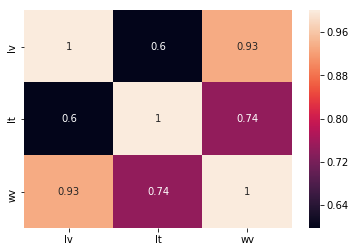

In [4]:
# Correlations between the data sets -- this didn't make it in the final document
corrs = pd.concat([lv.sum(), lt.sum(), wv.sum()], axis=1)
corrs.columns = ['lv', 'lt', 'wv']

print(round(corrs.corr(), 2))

import seaborn as sns
sns.heatmap(corrs.corr(), annot=True)


In [8]:
def add_years(df):
    for i in range(2018,2031):
        df = df.append(pd.Series(data=None, name=i))
    return df

from sklearn.linear_model import LinearRegression

def add_trend(ts):
    ts = pd.DataFrame(ts)
    
    y = ts.iloc[:,0].values.reshape(-1,1)
    X = ts.index.values.reshape(-1,1)
    lr = LinearRegression().fit(X,y)
    slope = lr.coef_[0][0]
    intercept = lr.intercept_[0]
    ts2 = add_years(ts)
    ts2['Year'] = ts2.index
    ts2['trend'] = ts2['Year']*slope + intercept
    return ts2


In [15]:
def plot_wild_and_farmed(s1,s2):
    s1 = s1.sum(axis=1)
    s2 = s2.sum(axis=1)
    ax.plot(s1)
    ax.plot(s2)

    

In [30]:
def add_trend(s1,c):
    s1 = s1.sum(axis=1)
    y = s1.values.reshape(-1,1)
    X = s1.index.values.reshape(-1,1)
    lr = LinearRegression().fit(X,y)
    slope = lr.coef_[0][0]
    intercept = lr.intercept_[0]
    idx = list(s1.index)
    trend = [x * slope + intercept for x in idx]
    trend = pd.Series(trend)
    trend.index = s1.index
    ax.plot(trend, color=c, linestyle=':')


In [32]:
def plot_everything():
    plot_wild_and_farmed(wv_wild, wv_farmed)
    add_trend(wv_wild, 'blue')
    add_trend(wv_farmed, 'orange')
    ax.legend(['wild', 'farmed'], loc = 'best')
    plt.xlabel('Year')
    plt.xticks(wv.index, rotation=60)

Text(0.5, 1.0, 'Landings')

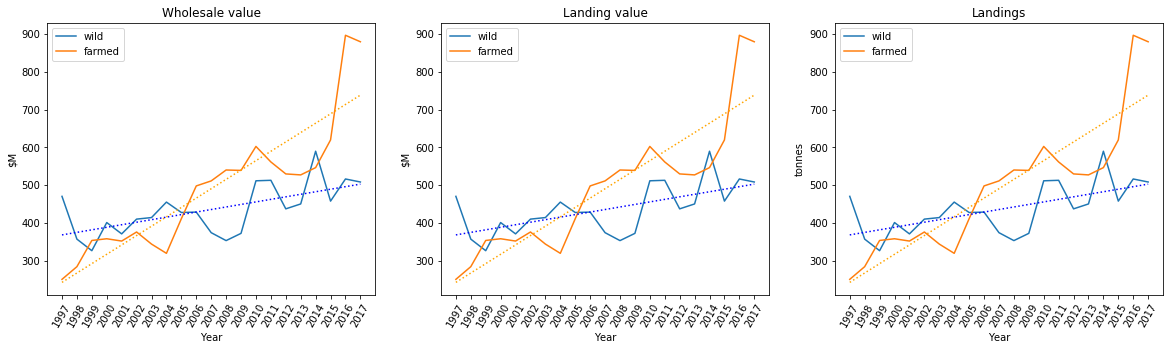

In [35]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
wv_wild = wv.loc[:, ['Wild' in x for x in wv.columns]]
wv_farmed = wv.loc[:, ['Farmed' in x for x in wv.columns]]
plot_everything()
plt.ylabel('$M')
plt.title('Wholesale value')

ax = fig.add_subplot(1,3,2)
lv_wild = lv.loc[:, ['Wild' in x for x in lv.columns]]
lv_farmed = wv.loc[:, ['Farmed' in x for x in lv.columns]]
plot_everything()
plt.ylabel('$M')
plt.title('Landing value')

ax = fig.add_subplot(1,3,3)
lt_wild = lt.loc[:, ['Wild' in x for x in lt.columns]]
lt_farmed = lt.loc[:, ['Farmed' in x for x in lt.columns]]
plot_everything()
plt.ylabel('tonnes')
plt.title('Landings')


